2. Machine Learning for Regression

In [1]:
# import libraries 
import pandas as pd 
import numpy as np 

In [2]:
# ingest dataset 
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv')

In [3]:
df.head()

Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   
2                Luxury,High-Performance      Compact         Coupe   
3                     Luxury,Performance      Compact         Coupe   
4                                 Luxury      Compact   Convertible   

   highway MPG  city mpg  Popularity   MSRP  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500

In [4]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df

make       model  year                engine_fuel_type  engine_hp  \
0          BMW  1 Series M  2011     premium unleaded (required)      335.0   
1          BMW    1 Series  2011     premium unleaded (required)      300.0   
2          BMW    1 Series  2011     premium unleaded (required)      300.0   
3          BMW    1 Series  2011     premium unleaded (required)      230.0   
4          BMW    1 Series  2011     premium unleaded (required)      230.0   
...        ...         ...   ...                             ...        ...   
11909    Acura         ZDX  2012     premium unleaded (required)      300.0   
11910    Acura         ZDX  2012     premium unleaded (required)      300.0   
11911    Acura         ZDX  2012     premium unleaded (required)      300.0   
11912    Acura         ZDX  2013  premium unleaded (recommended)      300.0   
11913  Lincoln      Zephyr  2006                regular unleaded      221.0   

       engine_cylinders transmission_type      driven_wheels  number_of_doors  \
0                   6.0            MANUAL   rear wheel drive              2.0   
1                   6.0            MANUAL   rear wheel drive              2.0   
2                   6.0            MANUAL   rear wheel drive              2.0   
3                   6.0            MANUAL   rear wheel drive              2.0   
4                   6.0            MANUAL   rear wheel drive              2.0   
...                 ...               ...                ...              ...   
11909               6.0         AUTOMATIC    all wheel drive              4.0   
11910               6.0         AUTOMATIC    all wheel drive              4.0   
11911               6.0         AUTOMATIC    all wheel drive              4.0   
11912               6.0         AUTOMATIC    all wheel drive              4.0   
11913               6.0         AUTOMATIC  front wheel drive              4.0   

                             market_category vehicle_size  vehicle_style  \
0      Factory Tuner,Luxury,High-Performance      Compact          Coupe   
1                         Luxury,Performance      Compact    Convertible   
2                    Luxury,High-Performance      Compact          Coupe   
3                         Luxury,Performance      Compact          Coupe   
4                                     Luxury      Compact    Convertible   
...                                      ...          ...            ...   
11909             Crossover,Hatchback,Luxury      Midsize  4dr Hatchback   
11910             Crossover,Hatchback,Luxury      Midsize  4dr Hatchback   
11911             Crossover,Hatchback,Luxury      Midsize  4dr Hatchback   
11912             Crossover,Hatchback,Luxury      Midsize  4dr Hatchback   
11913                                 Luxury      Midsize          Sedan   

       highway_mpg  city_mpg  popularity   msrp  
0               26        19        3916  46135  
1               28        19        3916  40650  
2               28        20        3916  36350  
3               28        18        3916  29450  
4               28        18        3916  34500  
...            ...       ...         ...    ...  
11909           23        16         204  46120  
11910           23        16         204  56670  
11911           23        16         204  50620  
11912           23        16         204  50920  
11913           26        17          61  28995  

[11914 rows x 16 columns]

In [7]:
df["transmission_type"] = df["transmission_type"].str.lower()
df

make       model  year                engine_fuel_type  engine_hp  \
0          BMW  1 Series M  2011     premium unleaded (required)      335.0   
1          BMW    1 Series  2011     premium unleaded (required)      300.0   
2          BMW    1 Series  2011     premium unleaded (required)      300.0   
3          BMW    1 Series  2011     premium unleaded (required)      230.0   
4          BMW    1 Series  2011     premium unleaded (required)      230.0   
...        ...         ...   ...                             ...        ...   
11909    Acura         ZDX  2012     premium unleaded (required)      300.0   
11910    Acura         ZDX  2012     premium unleaded (required)      300.0   
11911    Acura         ZDX  2012     premium unleaded (required)      300.0   
11912    Acura         ZDX  2013  premium unleaded (recommended)      300.0   
11913  Lincoln      Zephyr  2006                regular unleaded      221.0   

       engine_cylinders transmission_type      driven_wheels  number_of_doors  \
0                   6.0            manual   rear wheel drive              2.0   
1                   6.0            manual   rear wheel drive              2.0   
2                   6.0            manual   rear wheel drive              2.0   
3                   6.0            manual   rear wheel drive              2.0   
4                   6.0            manual   rear wheel drive              2.0   
...                 ...               ...                ...              ...   
11909               6.0         automatic    all wheel drive              4.0   
11910               6.0         automatic    all wheel drive              4.0   
11911               6.0         automatic    all wheel drive              4.0   
11912               6.0         automatic    all wheel drive              4.0   
11913               6.0         automatic  front wheel drive              4.0   

                             market_category vehicle_size  vehicle_style  \
0      Factory Tuner,Luxury,High-Performance      Compact          Coupe   
1                         Luxury,Performance      Compact    Convertible   
2                    Luxury,High-Performance      Compact          Coupe   
3                         Luxury,Performance      Compact          Coupe   
4                                     Luxury      Compact    Convertible   
...                                      ...          ...            ...   
11909             Crossover,Hatchback,Luxury      Midsize  4dr Hatchback   
11910             Crossover,Hatchback,Luxury      Midsize  4dr Hatchback   
11911             Crossover,Hatchback,Luxury      Midsize  4dr Hatchback   
11912             Crossover,Hatchback,Luxury      Midsize  4dr Hatchback   
11913                                 Luxury      Midsize          Sedan   

       highway_mpg  city_mpg  popularity   msrp  
0               26        19        3916  46135  
1               28        19        3916  40650  
2               28        20        3916  36350  
3               28        18        3916  29450  
4               28        18        3916  34500  
...            ...       ...         ...    ...  
11909           23        16         204  46120  
11910           23        16         204  56670  
11911           23        16         204  50620  
11912           23        16         204  50920  
11913           26        17          61  28995  

[11914 rows x 16 columns]

In [8]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [9]:
df.values

array([['BMW', '1 Series M', 2011, ..., 19, 3916, 46135],
       ['BMW', '1 Series', 2011, ..., 19, 3916, 40650],
       ['BMW', '1 Series', 2011, ..., 20, 3916, 36350],
       ...,
       ['Acura', 'ZDX', 2012, ..., 16, 204, 50620],
       ['Acura', 'ZDX', 2013, ..., 16, 204, 50920],
       ['Lincoln', 'Zephyr', 2006, ..., 17, 61, 28995]],
      shape=(11914, 16), dtype=object)

In [10]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [11]:
df.dtypes[df.dtypes == "object"]

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [12]:
df.dtypes[df.dtypes == "object"].index

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')

In [13]:
cols = list(df.dtypes[df.dtypes == "object"].index)
cols

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [ ]:
#df = df[["make", "model", "engine_fuel_type", "transmission_type", "driven_wheels", "market_category", "vehicle_size", "vehicle_style"]].str.lower()

In [14]:
for col in cols:
    df[col] = df[col].str.lower().str.replace(" ", "_")

In [15]:
df

make       model  year                engine_fuel_type  engine_hp  \
0          bmw  1_series_m  2011     premium_unleaded_(required)      335.0   
1          bmw    1_series  2011     premium_unleaded_(required)      300.0   
2          bmw    1_series  2011     premium_unleaded_(required)      300.0   
3          bmw    1_series  2011     premium_unleaded_(required)      230.0   
4          bmw    1_series  2011     premium_unleaded_(required)      230.0   
...        ...         ...   ...                             ...        ...   
11909    acura         zdx  2012     premium_unleaded_(required)      300.0   
11910    acura         zdx  2012     premium_unleaded_(required)      300.0   
11911    acura         zdx  2012     premium_unleaded_(required)      300.0   
11912    acura         zdx  2013  premium_unleaded_(recommended)      300.0   
11913  lincoln      zephyr  2006                regular_unleaded      221.0   

       engine_cylinders transmission_type      driven_wheels  number_of_doors  \
0                   6.0            manual   rear_wheel_drive              2.0   
1                   6.0            manual   rear_wheel_drive              2.0   
2                   6.0            manual   rear_wheel_drive              2.0   
3                   6.0            manual   rear_wheel_drive              2.0   
4                   6.0            manual   rear_wheel_drive              2.0   
...                 ...               ...                ...              ...   
11909               6.0         automatic    all_wheel_drive              4.0   
11910               6.0         automatic    all_wheel_drive              4.0   
11911               6.0         automatic    all_wheel_drive              4.0   
11912               6.0         automatic    all_wheel_drive              4.0   
11913               6.0         automatic  front_wheel_drive              4.0   

                             market_category vehicle_size  vehicle_style  \
0      factory_tuner,luxury,high-performance      compact          coupe   
1                         luxury,performance      compact    convertible   
2                    luxury,high-performance      compact          coupe   
3                         luxury,performance      compact          coupe   
4                                     luxury      compact    convertible   
...                                      ...          ...            ...   
11909             crossover,hatchback,luxury      midsize  4dr_hatchback   
11910             crossover,hatchback,luxury      midsize  4dr_hatchback   
11911             crossover,hatchback,luxury      midsize  4dr_hatchback   
11912             crossover,hatchback,luxury      midsize  4dr_hatchback   
11913                                 luxury      midsize          sedan   

       highway_mpg  city_mpg  popularity   msrp  
0               26        19        3916  46135  
1               28        19        3916  40650  
2               28        20        3916  36350  
3               28        18        3916  29450  
4               28        18        3916  34500  
...            ...       ...         ...    ...  
11909           23        16         204  46120  
11910           23        16         204  56670  
11911           23        16         204  50620  
11912           23        16         204  50920  
11913           26        17          61  28995  

[11914 rows x 16 columns]

In [16]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [17]:
df.columns 

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [18]:
for col in df.columns:
    print(col)
    print(df[col].head())
    print()

make
0    bmw
1    bmw
2    bmw
3    bmw
4    bmw
Name: make, dtype: object

model
0    1_series_m
1      1_series
2      1_series
3      1_series
4      1_series
Name: model, dtype: object

year
0    2011
1    2011
2    2011
3    2011
4    2011
Name: year, dtype: int64

engine_fuel_type
0    premium_unleaded_(required)
1    premium_unleaded_(required)
2    premium_unleaded_(required)
3    premium_unleaded_(required)
4    premium_unleaded_(required)
Name: engine_fuel_type, dtype: object

engine_hp
0    335.0
1    300.0
2    300.0
3    230.0
4    230.0
Name: engine_hp, dtype: float64

engine_cylinders
0    6.0
1    6.0
2    6.0
3    6.0
4    6.0
Name: engine_cylinders, dtype: float64

transmission_type
0    manual
1    manual
2    manual
3    manual
4    manual
Name: transmission_type, dtype: object

driven_wheels
0    rear_wheel_drive
1    rear_wheel_drive
2    rear_wheel_drive
3    rear_wheel_drive
4    rear_wheel_drive
Name: driven_wheels, dtype: object

number_of_doors
0    2.0
1   

In [19]:
for col in df.columns:
    print(col)
    print(df[col].nunique())
    print(df[col].unique()[:5])
    print()

make
48
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']

model
914
['1_series_m' '1_series' '100' '124_spider' '190-class']

year
28
[2011 2012 2013 1992 1993]

engine_fuel_type
10
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']

engine_hp
356
[335. 300. 230. 320. 172.]

engine_cylinders
9
[ 6.  4.  5.  8. 12.]

transmission_type
5
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']

driven_wheels
4
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']

number_of_doors
3
[ 2.  4.  3. nan]

market_category
71
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']

vehicle_size
3
['compact' 'midsize' 'large']

vehicle_style
16
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']

highway_mpg
59
[26 28 27 25 24]

city_mpg
69
[19 20 18 17 16]

popularity
48
[3916 3105  819  617 1013]

msrp
6049
[46135 40650 36350 2945

In [21]:
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline 
#Ensures the plot fits in-line within jupyter notebook

<Axes: xlabel='msrp', ylabel='Count'>

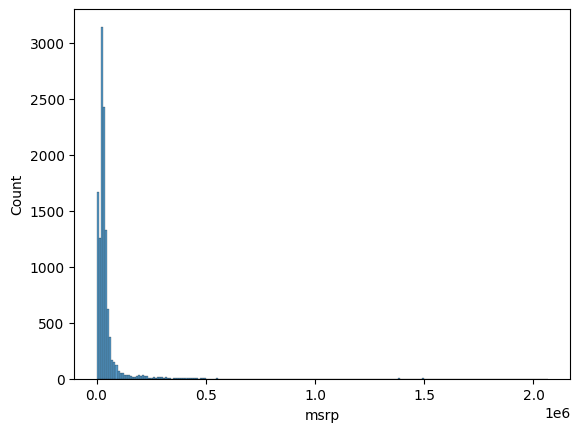

In [22]:
sns.histplot(df.msrp)

<Axes: xlabel='msrp', ylabel='Count'>

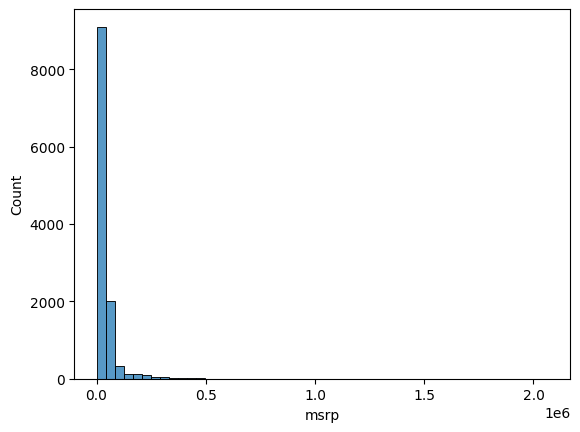

In [23]:
sns.histplot(df.msrp,bins=50)

<Axes: xlabel='msrp', ylabel='Count'>

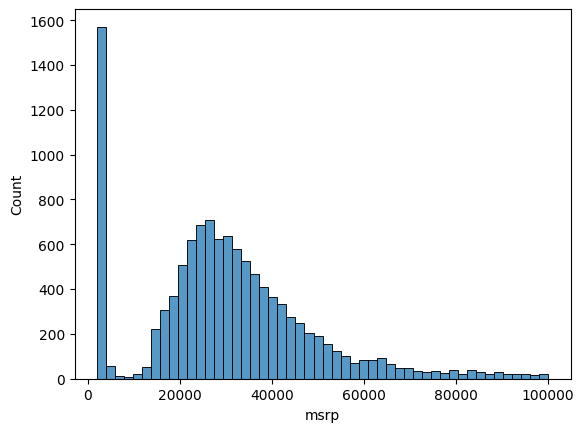

In [24]:
sns.histplot(df.msrp[df.msrp < 100000],bins=50)

In [25]:
np.log([1, 10, 100, 100000])

array([ 0.        ,  2.30258509,  4.60517019, 11.51292546])

In [26]:
np.log([0, 10, 100, 100000])

/tmp/ipykernel_5100/482098453.py:1: RuntimeWarning: divide by zero encountered in log
  np.log([0, 10, 100, 100000])


array([       -inf,  2.30258509,  4.60517019, 11.51292546])

In [27]:
np.log([0+1, 10+1, 100+1, 100000+1])

array([ 0.        ,  2.39789527,  4.61512052, 11.51293546])

In [25]:
# np.log1p([0, 10, 100, 100000]) = np.log([0+1, 10+1, 100+1, 100000+1])

In [28]:
np.log1p([0, 10, 100, 100000])

array([ 0.        ,  2.39789527,  4.61512052, 11.51293546])

In [30]:
price_logs = np.log1p(df.msrp)
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<Axes: xlabel='msrp', ylabel='Count'>

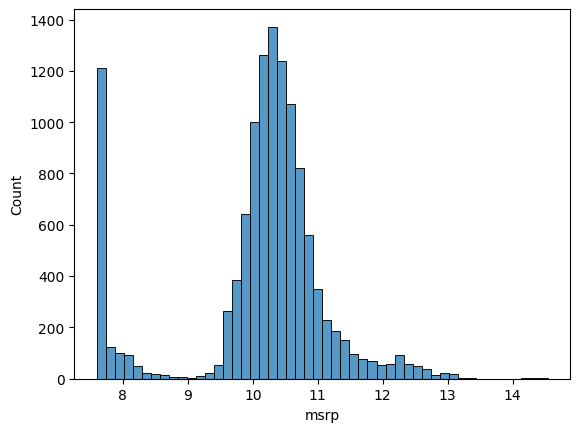

In [31]:
sns.histplot(price_logs,bins=50)

In [32]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [48]:
from IPython.display import Image
#Image("C:\\Users\\King Fisher\\Downloads\\2025-10-07 13_34_20-Greenshot.png")



In [33]:
import os
print(os.path.exists(r"C:\Users\King Fisher\Downloads\2025-10-07 13_34_20-Greenshot.png"))


False


In [34]:
len(df)

11914

In [35]:
int(len(df) * 0.2)

2382

In [36]:
int(len(df) * 0.6)

7148

In [37]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val -n_test

In [38]:
n, n_val, n_test, n_train

(11914, 2382, 2382, 7150)

In [39]:
n, n_val + n_test + n_train

(11914, 11914)

In [40]:
df.iloc[[0, 1, 2]]

make       model  year             engine_fuel_type  engine_hp  \
0  bmw  1_series_m  2011  premium_unleaded_(required)      335.0   
1  bmw    1_series  2011  premium_unleaded_(required)      300.0   
2  bmw    1_series  2011  premium_unleaded_(required)      300.0   

   engine_cylinders transmission_type     driven_wheels  number_of_doors  \
0               6.0            manual  rear_wheel_drive              2.0   
1               6.0            manual  rear_wheel_drive              2.0   
2               6.0            manual  rear_wheel_drive              2.0   

                         market_category vehicle_size vehicle_style  \
0  factory_tuner,luxury,high-performance      compact         coupe   
1                     luxury,performance      compact   convertible   
2                luxury,high-performance      compact         coupe   

   highway_mpg  city_mpg  popularity   msrp  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350

In [41]:
df.iloc[:10]

make       model  year             engine_fuel_type  engine_hp  \
0  bmw  1_series_m  2011  premium_unleaded_(required)      335.0   
1  bmw    1_series  2011  premium_unleaded_(required)      300.0   
2  bmw    1_series  2011  premium_unleaded_(required)      300.0   
3  bmw    1_series  2011  premium_unleaded_(required)      230.0   
4  bmw    1_series  2011  premium_unleaded_(required)      230.0   
5  bmw    1_series  2012  premium_unleaded_(required)      230.0   
6  bmw    1_series  2012  premium_unleaded_(required)      300.0   
7  bmw    1_series  2012  premium_unleaded_(required)      300.0   
8  bmw    1_series  2012  premium_unleaded_(required)      230.0   
9  bmw    1_series  2013  premium_unleaded_(required)      230.0   

   engine_cylinders transmission_type     driven_wheels  number_of_doors  \
0               6.0            manual  rear_wheel_drive              2.0   
1               6.0            manual  rear_wheel_drive              2.0   
2               6.0            manual  rear_wheel_drive              2.0   
3               6.0            manual  rear_wheel_drive              2.0   
4               6.0            manual  rear_wheel_drive              2.0   
5               6.0            manual  rear_wheel_drive              2.0   
6               6.0            manual  rear_wheel_drive              2.0   
7               6.0            manual  rear_wheel_drive              2.0   
8               6.0            manual  rear_wheel_drive              2.0   
9               6.0            manual  rear_wheel_drive              2.0   

                         market_category vehicle_size vehicle_style  \
0  factory_tuner,luxury,high-performance      compact         coupe   
1                     luxury,performance      compact   convertible   
2                luxury,high-performance      compact         coupe   
3                     luxury,performance      compact         coupe   
4                                 luxury      compact   convertible   
5                     luxury,performance      compact         coupe   
6                     luxury,performance      compact   convertible   
7                luxury,high-performance      compact         coupe   
8                                 luxury      compact   convertible   
9                                 luxury      compact   convertible   

   highway_mpg  city_mpg  popularity   msrp  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500  
5           28        18        3916  31200  
6           26        17        3916  44100  
7           28        20        3916  39300  
8           28        18        3916  36900  
9           27        18        3916  37200

In [42]:
n_val, n_test, n_train

(2382, 2382, 7150)

In [44]:
#df_val = df.iloc[:n_val]
#df_test = df.iloc[n_val:n_val + n_test]
#df_train = df.iloc[n_val + n_test: ]


In [43]:
df_train = df.iloc[: n_train]
df_val = df.iloc[n_train : n_train + n_val]
df_test = df.iloc[n_train + n_val:]


In [44]:
df_train

make       model  year             engine_fuel_type  engine_hp  \
0         bmw  1_series_m  2011  premium_unleaded_(required)      335.0   
1         bmw    1_series  2011  premium_unleaded_(required)      300.0   
2         bmw    1_series  2011  premium_unleaded_(required)      300.0   
3         bmw    1_series  2011  premium_unleaded_(required)      230.0   
4         bmw    1_series  2011  premium_unleaded_(required)      230.0   
...       ...         ...   ...                          ...        ...   
7145    mazda      navajo  1994             regular_unleaded      160.0   
7146    mazda      navajo  1994             regular_unleaded      160.0   
7147  lincoln   navigator  2015             regular_unleaded      365.0   
7148  lincoln   navigator  2015             regular_unleaded      365.0   
7149  lincoln   navigator  2015             regular_unleaded      365.0   

      engine_cylinders transmission_type     driven_wheels  number_of_doors  \
0                  6.0            manual  rear_wheel_drive              2.0   
1                  6.0            manual  rear_wheel_drive              2.0   
2                  6.0            manual  rear_wheel_drive              2.0   
3                  6.0            manual  rear_wheel_drive              2.0   
4                  6.0            manual  rear_wheel_drive              2.0   
...                ...               ...               ...              ...   
7145               6.0            manual  four_wheel_drive              2.0   
7146               6.0            manual  four_wheel_drive              2.0   
7147               6.0         automatic  four_wheel_drive              4.0   
7148               6.0         automatic  four_wheel_drive              4.0   
7149               6.0         automatic  rear_wheel_drive              4.0   

                            market_category vehicle_size vehicle_style  \
0     factory_tuner,luxury,high-performance      compact         coupe   
1                        luxury,performance      compact   convertible   
2                   luxury,high-performance      compact         coupe   
3                        luxury,performance      compact         coupe   
4                                    luxury      compact   convertible   
...                                     ...          ...           ...   
7145                                    NaN      compact       2dr_suv   
7146                                    NaN      compact       2dr_suv   
7147                                 luxury        large       4dr_suv   
7148                                 luxury        large       4dr_suv   
7149                                 luxury        large       4dr_suv   

      highway_mpg  city_mpg  popularity   msrp  
0              26        19        3916  46135  
1              28        19        3916  40650  
2              28        20        3916  36350  
3              28        18        3916  29450  
4              28        18        3916  34500  
...           ...       ...         ...    ...  
7145           18        14         586   2000  
7146           18        14         586   2000  
7147           20        15          61  65055  
7148           19        15          61  67220  
7149           22        16          61  61480  

[7150 rows x 16 columns]

In [45]:
df_val

make           model  year          engine_fuel_type  engine_hp  \
7150    lincoln       navigator  2015          regular_unleaded      365.0   
7151    lincoln       navigator  2016          regular_unleaded      380.0   
7152    lincoln       navigator  2016          regular_unleaded      380.0   
7153    lincoln       navigator  2016          regular_unleaded      380.0   
7154    lincoln       navigator  2016          regular_unleaded      380.0   
...         ...             ...   ...                       ...        ...   
9527  chevrolet  silverado_1500  2015  flex-fuel_(unleaded/e85)      285.0   
9528  chevrolet  silverado_1500  2015          regular_unleaded      355.0   
9529  chevrolet  silverado_1500  2015          regular_unleaded      355.0   
9530  chevrolet  silverado_1500  2015          regular_unleaded      355.0   
9531  chevrolet  silverado_1500  2015          regular_unleaded      355.0   

      engine_cylinders transmission_type     driven_wheels  number_of_doors  \
7150               6.0         automatic  rear_wheel_drive              4.0   
7151               6.0         automatic  rear_wheel_drive              4.0   
7152               6.0         automatic  four_wheel_drive              4.0   
7153               6.0         automatic  four_wheel_drive              4.0   
7154               6.0         automatic  rear_wheel_drive              4.0   
...                ...               ...               ...              ...   
9527               6.0         automatic  four_wheel_drive              4.0   
9528               8.0         automatic  rear_wheel_drive              4.0   
9529               8.0         automatic  rear_wheel_drive              4.0   
9530               8.0         automatic  rear_wheel_drive              4.0   
9531               8.0         automatic  four_wheel_drive              4.0   

     market_category vehicle_size        vehicle_style  highway_mpg  city_mpg  \
7150          luxury        large              4dr_suv           20        15   
7151          luxury        large              4dr_suv           22        16   
7152          luxury        large              4dr_suv           19        15   
7153          luxury        large              4dr_suv           19        15   
7154          luxury        large              4dr_suv           20        15   
...              ...          ...                  ...          ...       ...   
9527       flex_fuel        large      crew_cab_pickup           22        17   
9528             NaN        large  extended_cab_pickup           23        16   
9529             NaN        large      crew_cab_pickup           23        16   
9530             NaN        large      crew_cab_pickup           23        16   
9531             NaN        large      crew_cab_pickup           22        16   

      popularity   msrp  
7150          61  63645  
7151          61  63195  
7152          61  76650  
7153          61  69135  
7154          61  65560  
...          ...    ...  
9527        1385  37380  
9528        1385  40100  
9529        1385  42560  
9530        1385  42860  
9531        1385  45120  

[2382 rows x 16 columns]

In [46]:
df_test

make           model  year                engine_fuel_type  \
9532   chevrolet  silverado_1500  2015                regular_unleaded   
9533   chevrolet  silverado_1500  2015        flex-fuel_(unleaded/e85)   
9534   chevrolet  silverado_1500  2015        flex-fuel_(unleaded/e85)   
9535   chevrolet  silverado_1500  2015        flex-fuel_(unleaded/e85)   
9536   chevrolet  silverado_1500  2015        flex-fuel_(unleaded/e85)   
...          ...             ...   ...                             ...   
11909      acura             zdx  2012     premium_unleaded_(required)   
11910      acura             zdx  2012     premium_unleaded_(required)   
11911      acura             zdx  2012     premium_unleaded_(required)   
11912      acura             zdx  2013  premium_unleaded_(recommended)   
11913    lincoln          zephyr  2006                regular_unleaded   

       engine_hp  engine_cylinders transmission_type      driven_wheels  \
9532       355.0               8.0         automatic   rear_wheel_drive   
9533       285.0               6.0         automatic   rear_wheel_drive   
9534       285.0               6.0         automatic   rear_wheel_drive   
9535       285.0               6.0         automatic   rear_wheel_drive   
9536       285.0               6.0         automatic   rear_wheel_drive   
...          ...               ...               ...                ...   
11909      300.0               6.0         automatic    all_wheel_drive   
11910      300.0               6.0         automatic    all_wheel_drive   
11911      300.0               6.0         automatic    all_wheel_drive   
11912      300.0               6.0         automatic    all_wheel_drive   
11913      221.0               6.0         automatic  front_wheel_drive   

       number_of_doors             market_category vehicle_size  \
9532               4.0                         NaN        large   
9533               4.0                   flex_fuel        large   
9534               4.0                   flex_fuel        large   
9535               4.0                   flex_fuel        large   
9536               2.0                   flex_fuel        large   
...                ...                         ...          ...   
11909              4.0  crossover,hatchback,luxury      midsize   
11910              4.0  crossover,hatchback,luxury      midsize   
11911              4.0  crossover,hatchback,luxury      midsize   
11912              4.0  crossover,hatchback,luxury      midsize   
11913              4.0                      luxury      midsize   

             vehicle_style  highway_mpg  city_mpg  popularity   msrp  
9532       crew_cab_pickup           23        16        1385  47575  
9533   extended_cab_pickup           24        18        1385  31940  
9534       crew_cab_pickup           24        18        1385  38335  
9535   extended_cab_pickup           24        18        1385  35870  
9536    regular_cab_pickup           24        18        1385  28155  
...                    ...          ...       ...         ...    ...  
11909        4dr_hatchback           23        16         204  46120  
11910        4dr_hatchback           23        16         204  56670  
11911        4dr_hatchback           23        16         204  50620  
11912        4dr_hatchback           23        16         204  50920  
11913                sedan           26        17          61  28995  

[2382 rows x 16 columns]

In [47]:
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)

In [48]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train : n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]


In [78]:
df_train

make        model  year                engine_fuel_type  \
2735     chevrolet       cobalt  2008                regular_unleaded   
6720        toyota       matrix  2012                regular_unleaded   
5878        subaru      impreza  2016                regular_unleaded   
11190   volkswagen      vanagon  1991                regular_unleaded   
4554          ford        f-150  2017        flex-fuel_(unleaded/e85)   
...            ...          ...   ...                             ...   
434            bmw     4_series  2015     premium_unleaded_(required)   
1902    volkswagen       beetle  2015  premium_unleaded_(recommended)   
9334           gmc  sierra_1500  2015        flex-fuel_(unleaded/e85)   
5284   rolls-royce        ghost  2014     premium_unleaded_(required)   
2420    volkswagen           cc  2017  premium_unleaded_(recommended)   

       engine_hp  engine_cylinders transmission_type      driven_wheels  \
2735       148.0               4.0            manual  front_wheel_drive   
6720       132.0               4.0         automatic  front_wheel_drive   
5878       148.0               4.0         automatic    all_wheel_drive   
11190       90.0               4.0            manual   rear_wheel_drive   
4554       385.0               8.0         automatic   four_wheel_drive   
...          ...               ...               ...                ...   
434        300.0               6.0         automatic   rear_wheel_drive   
1902       210.0               4.0  automated_manual  front_wheel_drive   
9334       285.0               6.0         automatic   four_wheel_drive   
5284       563.0              12.0         automatic   rear_wheel_drive   
2420       200.0               4.0  automated_manual  front_wheel_drive   

       number_of_doors            market_category vehicle_size  \
2735               2.0                        NaN      compact   
6720               4.0                  hatchback      compact   
5878               4.0                  hatchback      compact   
11190              3.0                        NaN        large   
4554               4.0                  flex_fuel        large   
...                ...                        ...          ...   
434                2.0         luxury,performance      midsize   
1902               2.0      hatchback,performance      compact   
9334               4.0                  flex_fuel        large   
5284               4.0  exotic,luxury,performance        large   
2420               4.0                performance      midsize   

             vehicle_style  highway_mpg  city_mpg  popularity    msrp  
2735                 coupe           33        24        1385   14410  
6720         4dr_hatchback           32        25        2031   19685  
5878         4dr_hatchback           37        28         640   19795  
11190    passenger_minivan           18        16         873    2000  
4554       crew_cab_pickup           21        15        5657   56260  
...                    ...          ...       ...         ...     ...  
434            convertible           31        20        3916   54900  
1902         2dr_hatchback           30        24         873   29215  
9334   extended_cab_pickup           22        17         549   34675  
5284                 sedan           21        13          86  303300  
2420                 sedan           31        22         873   37820  

[7150 rows x 16 columns]

In [49]:
df_val

make                    model  year  \
2779       chevrolet                 colorado  2015   
3708   mercedes-benz                  e-class  2017   
4794            ford                    focus  2017   
10498          acura                      tlx  2016   
1880      volkswagen       beetle_convertible  2016   
...              ...                      ...   ...   
11123          volvo                      v60  2015   
5549        maserati  granturismo_convertible  2015   
4146        cadillac          escalade_hybrid  2013   
6337      mitsubishi                   lancer  2016   
9814             kia                  sorento  2015   

                     engine_fuel_type  engine_hp  engine_cylinders  \
2779                 regular_unleaded      200.0               4.0   
3708      premium_unleaded_(required)      241.0               4.0   
4794         flex-fuel_(unleaded/e85)      160.0               4.0   
10498  premium_unleaded_(recommended)      290.0               6.0   
1880                 regular_unleaded      170.0               4.0   
...                               ...        ...               ...   
11123                regular_unleaded      240.0               4.0   
5549      premium_unleaded_(required)      444.0               8.0   
4146                 regular_unleaded      332.0               8.0   
6337                 regular_unleaded      148.0               4.0   
9814                 regular_unleaded      290.0               6.0   

      transmission_type      driven_wheels  number_of_doors  \
2779          automatic   four_wheel_drive              4.0   
3708          automatic    all_wheel_drive              4.0   
4794             manual  front_wheel_drive              4.0   
10498         automatic  front_wheel_drive              4.0   
1880          automatic  front_wheel_drive              2.0   
...                 ...                ...              ...   
11123         automatic  front_wheel_drive              4.0   
5549          automatic   rear_wheel_drive              2.0   
4146          automatic   rear_wheel_drive              4.0   
6337             manual  front_wheel_drive              4.0   
9814          automatic  front_wheel_drive              4.0   

                      market_category vehicle_size        vehicle_style  \
2779                              NaN      compact  extended_cab_pickup   
3708                           luxury      midsize                sedan   
4794                        flex_fuel      compact                sedan   
10498                          luxury      midsize                sedan   
1880                              NaN      compact          convertible   
...                               ...          ...                  ...   
11123                          luxury      midsize                wagon   
5549   exotic,luxury,high-performance      midsize          convertible   
4146                    luxury,hybrid        large              4dr_suv   
6337                              NaN      compact                sedan   
9814                        crossover      midsize              4dr_suv   

       highway_mpg  city_mpg  popularity    msrp  
2779            25        19        1385   26885  
3708            29        22         617   54650  
4794            36        26        5657   16775  
10498           34        21         204   42600  
1880            34        25         873   25995  
...            ...       ...         ...     ...  
11123           37        25         870   35750  
5549            20        13         238  145740  
4146            23        20        1624   74425  
6337            34        24         436   17595  
9814            25        18        1720   26700  

[2382 rows x 16 columns]

In [50]:
df_test

make           model  year          engine_fuel_type  \
11195            gmc         vandura  1994          regular_unleaded   
673    mercedes-benz       600-class  1993          regular_unleaded   
11270         toyota           venza  2013          regular_unleaded   
752            volvo             740  1992          regular_unleaded   
3137            ford  crown_victoria  2010  flex-fuel_(unleaded/e85)   
...              ...             ...   ...                       ...   
2514       chevrolet       chevy_van  1998          regular_unleaded   
11798         subaru    xv_crosstrek  2014          regular_unleaded   
6637           dodge          magnum  2006          regular_unleaded   
2575           honda           civic  2016          regular_unleaded   
7336          subaru         outback  2015          regular_unleaded   

       engine_hp  engine_cylinders transmission_type      driven_wheels  \
11195      165.0               6.0         automatic   rear_wheel_drive   
673        389.0              12.0         automatic   rear_wheel_drive   
11270      268.0               6.0         automatic    all_wheel_drive   
752        114.0               4.0         automatic   rear_wheel_drive   
3137       224.0               8.0         automatic   rear_wheel_drive   
...          ...               ...               ...                ...   
2514       200.0               6.0         automatic   rear_wheel_drive   
11798      160.0               4.0         automatic    all_wheel_drive   
6637       250.0               6.0         automatic    all_wheel_drive   
2575       174.0               4.0         automatic  front_wheel_drive   
7336       256.0               6.0         automatic    all_wheel_drive   

       number_of_doors        market_category vehicle_size vehicle_style  \
11195              3.0                    NaN      compact     cargo_van   
673                2.0                 luxury        large         coupe   
11270              4.0  crossover,performance      midsize         wagon   
752                4.0                 luxury      midsize         sedan   
3137               4.0              flex_fuel        large         sedan   
...                ...                    ...          ...           ...   
2514               3.0                    NaN      midsize     cargo_van   
11798              4.0       crossover,hybrid      compact       4dr_suv   
6637               4.0                    NaN        large         wagon   
2575               4.0                    NaN      midsize         sedan   
7336               4.0              crossover      midsize       4dr_suv   

       highway_mpg  city_mpg  popularity   msrp  
11195           20        15         549   2000  
673             15        11         617   3211  
11270           25        18        2031  31120  
752             26        18         870   2000  
3137            24        16        5657  29905  
...            ...       ...         ...    ...  
2514            18        13        1385   2052  
11798           33        29         640  25995  
6637            22        15        1851  29100  
2575            42        31        2202  22200  
7336            27        20         640  32995  

[2382 rows x 16 columns]

In [51]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [52]:
df_train = df_train.reset_index(drop=True)
df_train

make        model  year                engine_fuel_type  \
0       chevrolet       cobalt  2008                regular_unleaded   
1          toyota       matrix  2012                regular_unleaded   
2          subaru      impreza  2016                regular_unleaded   
3      volkswagen      vanagon  1991                regular_unleaded   
4            ford        f-150  2017        flex-fuel_(unleaded/e85)   
...           ...          ...   ...                             ...   
7145          bmw     4_series  2015     premium_unleaded_(required)   
7146   volkswagen       beetle  2015  premium_unleaded_(recommended)   
7147          gmc  sierra_1500  2015        flex-fuel_(unleaded/e85)   
7148  rolls-royce        ghost  2014     premium_unleaded_(required)   
7149   volkswagen           cc  2017  premium_unleaded_(recommended)   

      engine_hp  engine_cylinders transmission_type      driven_wheels  \
0         148.0               4.0            manual  front_wheel_drive   
1         132.0               4.0         automatic  front_wheel_drive   
2         148.0               4.0         automatic    all_wheel_drive   
3          90.0               4.0            manual   rear_wheel_drive   
4         385.0               8.0         automatic   four_wheel_drive   
...         ...               ...               ...                ...   
7145      300.0               6.0         automatic   rear_wheel_drive   
7146      210.0               4.0  automated_manual  front_wheel_drive   
7147      285.0               6.0         automatic   four_wheel_drive   
7148      563.0              12.0         automatic   rear_wheel_drive   
7149      200.0               4.0  automated_manual  front_wheel_drive   

      number_of_doors            market_category vehicle_size  \
0                 2.0                        NaN      compact   
1                 4.0                  hatchback      compact   
2                 4.0                  hatchback      compact   
3                 3.0                        NaN        large   
4                 4.0                  flex_fuel        large   
...               ...                        ...          ...   
7145              2.0         luxury,performance      midsize   
7146              2.0      hatchback,performance      compact   
7147              4.0                  flex_fuel        large   
7148              4.0  exotic,luxury,performance        large   
7149              4.0                performance      midsize   

            vehicle_style  highway_mpg  city_mpg  popularity    msrp  
0                   coupe           33        24        1385   14410  
1           4dr_hatchback           32        25        2031   19685  
2           4dr_hatchback           37        28         640   19795  
3       passenger_minivan           18        16         873    2000  
4         crew_cab_pickup           21        15        5657   56260  
...                   ...          ...       ...         ...     ...  
7145          convertible           31        20        3916   54900  
7146        2dr_hatchback           30        24         873   29215  
7147  extended_cab_pickup           22        17         549   34675  
7148                sedan           21        13          86  303300  
7149                sedan           31        22         873   37820  

[7150 rows x 16 columns]

In [53]:
df_val = df_val.reset_index(drop=True)
df_val

make                    model  year  \
0         chevrolet                 colorado  2015   
1     mercedes-benz                  e-class  2017   
2              ford                    focus  2017   
3             acura                      tlx  2016   
4        volkswagen       beetle_convertible  2016   
...             ...                      ...   ...   
2377          volvo                      v60  2015   
2378       maserati  granturismo_convertible  2015   
2379       cadillac          escalade_hybrid  2013   
2380     mitsubishi                   lancer  2016   
2381            kia                  sorento  2015   

                    engine_fuel_type  engine_hp  engine_cylinders  \
0                   regular_unleaded      200.0               4.0   
1        premium_unleaded_(required)      241.0               4.0   
2           flex-fuel_(unleaded/e85)      160.0               4.0   
3     premium_unleaded_(recommended)      290.0               6.0   
4                   regular_unleaded      170.0               4.0   
...                              ...        ...               ...   
2377                regular_unleaded      240.0               4.0   
2378     premium_unleaded_(required)      444.0               8.0   
2379                regular_unleaded      332.0               8.0   
2380                regular_unleaded      148.0               4.0   
2381                regular_unleaded      290.0               6.0   

     transmission_type      driven_wheels  number_of_doors  \
0            automatic   four_wheel_drive              4.0   
1            automatic    all_wheel_drive              4.0   
2               manual  front_wheel_drive              4.0   
3            automatic  front_wheel_drive              4.0   
4            automatic  front_wheel_drive              2.0   
...                ...                ...              ...   
2377         automatic  front_wheel_drive              4.0   
2378         automatic   rear_wheel_drive              2.0   
2379         automatic   rear_wheel_drive              4.0   
2380            manual  front_wheel_drive              4.0   
2381         automatic  front_wheel_drive              4.0   

                     market_category vehicle_size        vehicle_style  \
0                                NaN      compact  extended_cab_pickup   
1                             luxury      midsize                sedan   
2                          flex_fuel      compact                sedan   
3                             luxury      midsize                sedan   
4                                NaN      compact          convertible   
...                              ...          ...                  ...   
2377                          luxury      midsize                wagon   
2378  exotic,luxury,high-performance      midsize          convertible   
2379                   luxury,hybrid        large              4dr_suv   
2380                             NaN      compact                sedan   
2381                       crossover      midsize              4dr_suv   

      highway_mpg  city_mpg  popularity    msrp  
0              25        19        1385   26885  
1              29        22         617   54650  
2              36        26        5657   16775  
3              34        21         204   42600  
4              34        25         873   25995  
...           ...       ...         ...     ...  
2377           37        25         870   35750  
2378           20        13         238  145740  
2379           23        20        1624   74425  
2380           34        24         436   17595  
2381           25        18        1720   26700  

[2382 rows x 16 columns]

In [54]:
df_test = df_test.reset_index(drop=True)
df_test

make           model  year          engine_fuel_type  \
0               gmc         vandura  1994          regular_unleaded   
1     mercedes-benz       600-class  1993          regular_unleaded   
2            toyota           venza  2013          regular_unleaded   
3             volvo             740  1992          regular_unleaded   
4              ford  crown_victoria  2010  flex-fuel_(unleaded/e85)   
...             ...             ...   ...                       ...   
2377      chevrolet       chevy_van  1998          regular_unleaded   
2378         subaru    xv_crosstrek  2014          regular_unleaded   
2379          dodge          magnum  2006          regular_unleaded   
2380          honda           civic  2016          regular_unleaded   
2381         subaru         outback  2015          regular_unleaded   

      engine_hp  engine_cylinders transmission_type      driven_wheels  \
0         165.0               6.0         automatic   rear_wheel_drive   
1         389.0              12.0         automatic   rear_wheel_drive   
2         268.0               6.0         automatic    all_wheel_drive   
3         114.0               4.0         automatic   rear_wheel_drive   
4         224.0               8.0         automatic   rear_wheel_drive   
...         ...               ...               ...                ...   
2377      200.0               6.0         automatic   rear_wheel_drive   
2378      160.0               4.0         automatic    all_wheel_drive   
2379      250.0               6.0         automatic    all_wheel_drive   
2380      174.0               4.0         automatic  front_wheel_drive   
2381      256.0               6.0         automatic    all_wheel_drive   

      number_of_doors        market_category vehicle_size vehicle_style  \
0                 3.0                    NaN      compact     cargo_van   
1                 2.0                 luxury        large         coupe   
2                 4.0  crossover,performance      midsize         wagon   
3                 4.0                 luxury      midsize         sedan   
4                 4.0              flex_fuel        large         sedan   
...               ...                    ...          ...           ...   
2377              3.0                    NaN      midsize     cargo_van   
2378              4.0       crossover,hybrid      compact       4dr_suv   
2379              4.0                    NaN        large         wagon   
2380              4.0                    NaN      midsize         sedan   
2381              4.0              crossover      midsize       4dr_suv   

      highway_mpg  city_mpg  popularity   msrp  
0              20        15         549   2000  
1              15        11         617   3211  
2              25        18        2031  31120  
3              26        18         870   2000  
4              24        16        5657  29905  
...           ...       ...         ...    ...  
2377           18        13        1385   2052  
2378           33        29         640  25995  
2379           22        15        1851  29100  
2380           42        31        2202  22200  
2381           27        20         640  32995  

[2382 rows x 16 columns]

In [55]:
np.log1p(df_train.msrp) 

0        9.575747
1        9.887663
2        9.893235
3        7.601402
4       10.937757
          ...    
7145    10.913287
7146    10.282472
7147    10.453803
7148    12.622481
7149    10.540620
Name: msrp, Length: 7150, dtype: float64

In [56]:
np.log1p(df_train.msrp.values) 

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978], shape=(7150,))

In [57]:
y_train  = np.log1p(df_train.msrp.values) 
y_val = np.log1p(df_val.msrp.values) 
y_test = np.log1p(df_test.msrp.values) 

In [58]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [59]:
len(y_train)

7150